# Simple Linear Regression Q1

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model. 

Delivery_time -> Predict delivery time using sorting time.

use delivery_time.csv


### Import new dataset

In [2]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("delivery_time.csv")
data.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, inplace = True)

In [3]:
data.info() #There are no null values in this dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
data['sorting_time'] = data['sorting_time'].astype(float)
data

,delivery_time,sorting_time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [5]:
data.shape

(21, 2)

In [6]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

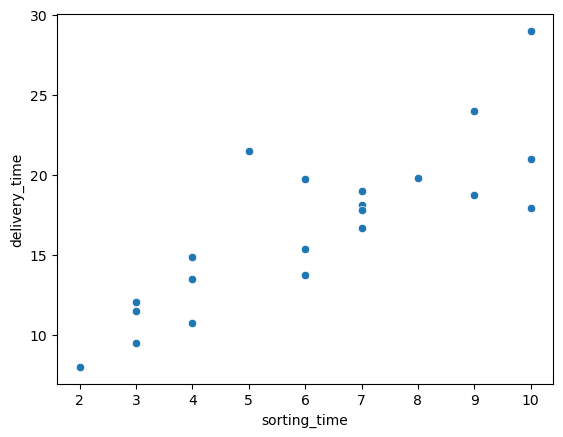

In [7]:
sns.scatterplot(x=data["sorting_time"],y=data["delivery_time"])

<function matplotlib.pyplot.show(close=None, block=None)>

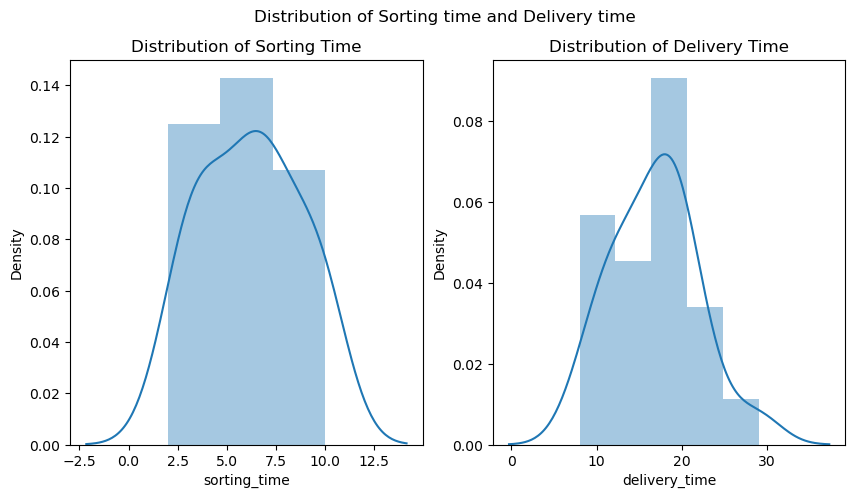

In [8]:
#DistPlot
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Distribution of Sorting time and Delivery time')

#Sorting Time
sns.distplot(data['sorting_time'],ax=axes[0])
axes[0].set_title('Distribution of Sorting Time')

#Delivery Time
sns.distplot(data['delivery_time'],ax=axes[1])
axes[1].set_title('Distribution of Delivery Time')

plt.show

### Correlation Analysis

In [9]:
data.corr() # There is a descent correlation between sorting time and delivery time

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


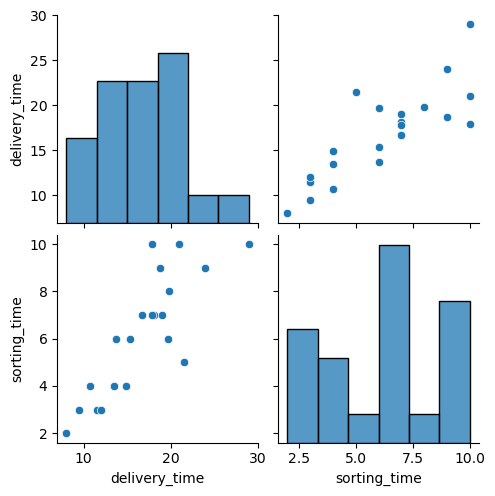

In [10]:
sns.pairplot(data) #There is good linear relation.

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

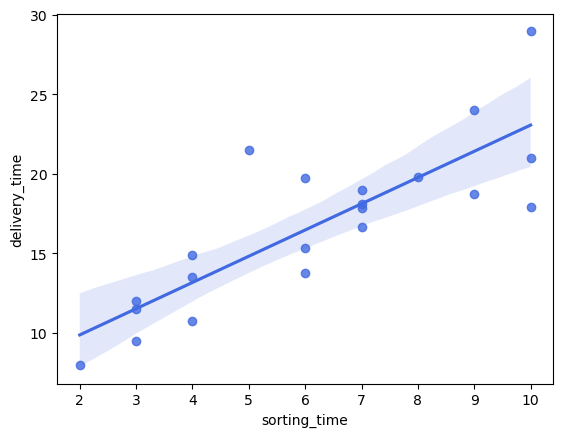

In [11]:
sns.regplot(x="sorting_time", y="delivery_time", data=data, color='royalblue')

### Fitting a Linear Regression Model

#### Using Skit-Learn Linear Regression
This library isnt as good as the statsmodel one for first time learning and analysing p-values. 

In [12]:
y = data['delivery_time']
X = [[x] for x in data['sorting_time']]
X #For Skitlearn Library, data needs to be in this format to work.

[[10.0],
 [4.0],
 [6.0],
 [9.0],
 [10.0],
 [6.0],
 [7.0],
 [3.0],
 [10.0],
 [9.0],
 [8.0],
 [4.0],
 [7.0],
 [3.0],
 [3.0],
 [4.0],
 [6.0],
 [7.0],
 [2.0],
 [7.0],
 [5.0]]

In [13]:
model1 = LinearRegression() #This library does not give proper parameters for testing as in p-values, AIC, Adj R Sqr. 
model1.fit(X,y)

LinearRegression()

In [14]:
model1.score(X, y) #R-Sqr Value R-Value is very poor.

0.6822714748417231

In [15]:
model1.intercept_ #B0 value

6.58273397199706

In [16]:
test_sort = np.array([[5.5]])
model1.predict(test_sort) #Predicting Delivery time for Sorting time = 5.5

array([15.6523434])

#### Using statsmodels library

In [17]:
import statsmodels.formula.api as smf
model2 = smf.ols("delivery_time~sorting_time",data = data).fit()

In [18]:
model2.summary() 
#R-Sqr value is poor
#p-values reveal that delivery time and sorting time are very dependent. Default alternate hypothesis is accepted

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        11:20:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Coefficients
model2.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
#t and p-Values
print(model2.tvalues) 

Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [21]:
print(model2.pvalues)  

Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [22]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [23]:
test_sort1 = pd.Series([3.5,7.5])
data_pred=pd.DataFrame(test_sort1,columns=['sorting_time'])
model2.predict(data_pred)

0    12.354304
1    18.950383
dtype: float64

### Model Improvement and Outlier Elimination

<Axes: >

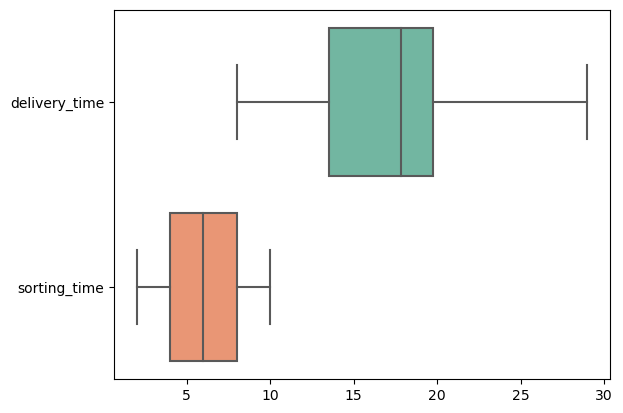

In [24]:
sns.boxplot(data=data, orient="h", palette="Set2") #There are no extreme outliers in this case. 

The model has been created for predicting delivery time from sorting time. However, the variance valueis only 68% which is not very ideal model. The sample size needs to be increased to further improve this model. 

# Simple Linear Regression Q2

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model. 

2) Salary_hike -> Build a prediction model for Salary_hike

use salary_data.csv

In [25]:
data = pd.read_csv("salary_data.csv")
data.rename(columns={'YearsExperience':'years_exp','Salary':'salary'}, inplace = True)

In [26]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   years_exp  30 non-null     float64
 1   salary     30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [27]:
data.shape

(30, 2)

In [28]:
data.describe()

,years_exp,salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='years_exp', ylabel='salary'>

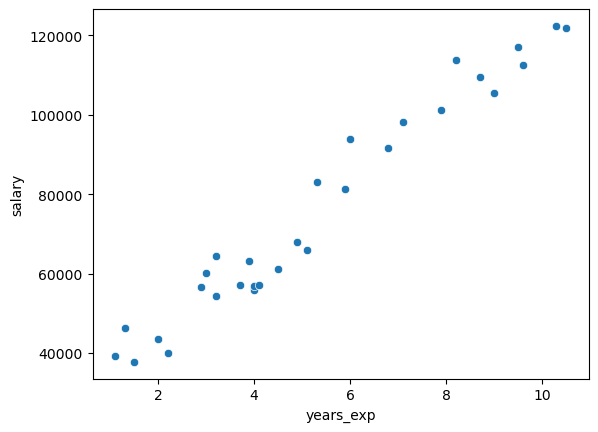

In [29]:
sns.scatterplot(x=data["years_exp"],y=data["salary"])

<function matplotlib.pyplot.show(close=None, block=None)>

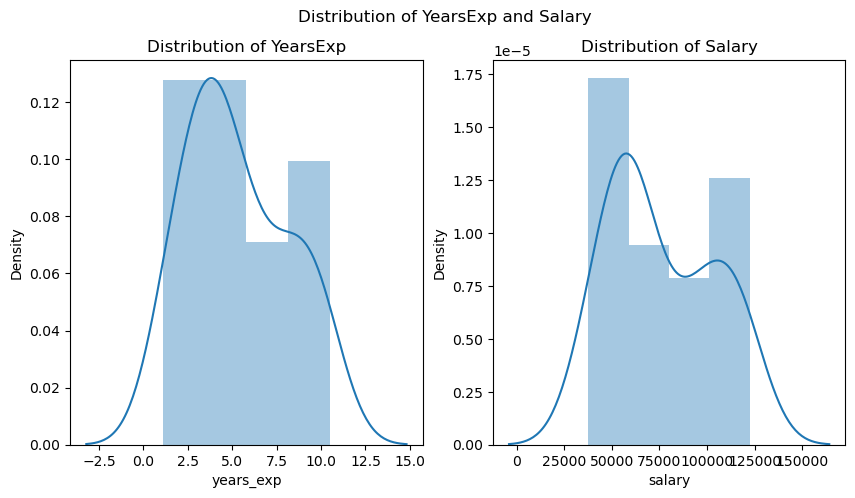

In [30]:
#DistPlot
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Distribution of YearsExp and Salary')

#Sorting Time
sns.distplot(data['years_exp'],ax=axes[0])
axes[0].set_title('Distribution of YearsExp')

#Delivery Time
sns.distplot(data['salary'],ax=axes[1])
axes[1].set_title('Distribution of Salary')

plt.show #Somewhat of a normal distribution

In [31]:
data.corr()

,years_exp,salary
years_exp,1.000000,0.978242
salary,0.978242,1.000000


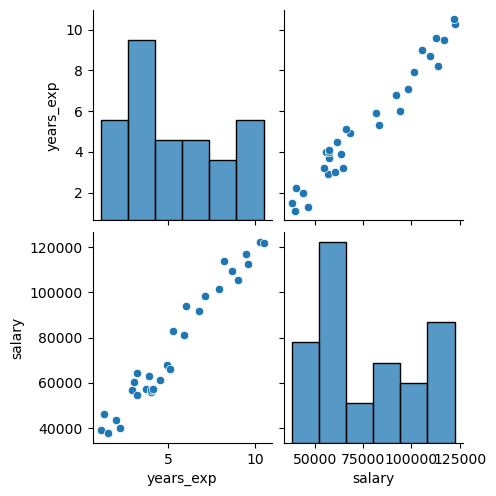

In [32]:
sns.pairplot(data)

<Axes: xlabel='years_exp', ylabel='salary'>

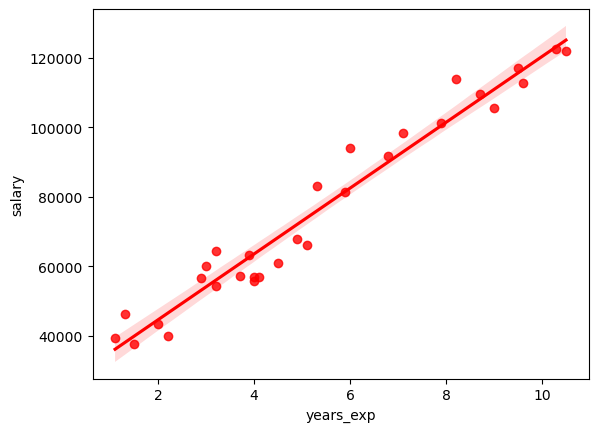

In [33]:
sns.regplot(x="years_exp", y="salary", data=data, color='r')

In [34]:
### Fitting a Linear Regression Model

#### Using Skit-Learn Linear Regression

In [35]:
y = data['salary']
X = [[x] for x in data['years_exp']]
X

[[1.1],
 [1.3],
 [1.5],
 [2.0],
 [2.2],
 [2.9],
 [3.0],
 [3.2],
 [3.2],
 [3.7],
 [3.9],
 [4.0],
 [4.0],
 [4.1],
 [4.5],
 [4.9],
 [5.1],
 [5.3],
 [5.9],
 [6.0],
 [6.8],
 [7.1],
 [7.9],
 [8.2],
 [8.7],
 [9.0],
 [9.5],
 [9.6],
 [10.3],
 [10.5]]

In [36]:
model1 = LinearRegression() 
model1.fit(X,y)

LinearRegression()

In [37]:
model1.score(X, y)

0.9569566641435086

In [38]:
model1.intercept_

25792.20019866871

In [39]:
test_sort = np.array([[6.5]])
model1.predict(test_sort)

array([87216.95528813])

In [40]:
#### Using statsmodels library

In [41]:
import statsmodels.formula.api as smf
model2 = smf.ols("salary~years_exp",data = data).fit()

In [42]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        11:20:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_exp   9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model2.params

Intercept    25792.200199
years_exp     9449.962321
dtype: float64

In [44]:
print(model2.tvalues) 

Intercept    11.346940
years_exp    24.950094
dtype: float64


In [45]:
print(model2.pvalues) 

Intercept    5.511950e-12
years_exp    1.143068e-20
dtype: float64


In [46]:
#R squared values
(model2.rsquared,model2.rsquared_adj) #Very good values

(0.9569566641435086, 0.9554194021486339)

In [47]:
test_sort1 = pd.Series([3.5,7.5])
data_pred=pd.DataFrame(test_sort1,columns=['years_exp'])
model2.predict(data_pred)

0    58867.068324
1    96666.917610
dtype: float64

The model has been created for predicting salary from the years of experience. The R-values are excellent for this model(about 95%). This model can predict salaries very accurately.